In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Preparation data

In [2]:
labs = pd.read_csv('data/labs_first_day.csv', index_col = [0, 1], header = [0, 1])
outcomes = pd.read_csv('data/outcomes_first_day.csv', index_col = 0)

### Analysis

In [3]:
labs.columns = labs.columns.droplevel() 

<AxesSubplot:ylabel='Lab'>

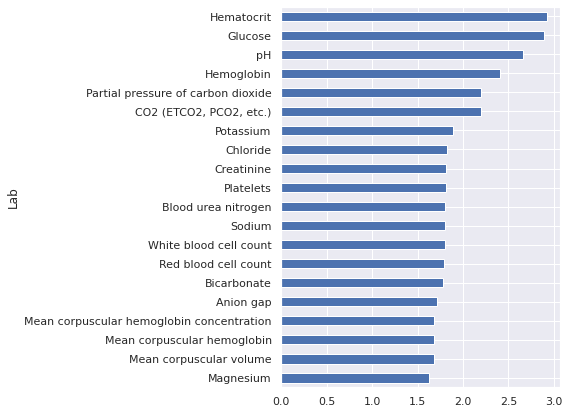

In [26]:
labs.groupby('Patient').count().mean().sort_values()[-20:].plot.barh(figsize = (5,7))

### How many different labs in this period ?

In [27]:
number_events = ((~labs.isna()).sum(axis = 1) > 0).groupby('Patient').sum()
number_events.describe()

count    35529.000000
mean         5.872949
std          4.822790
min          0.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         40.000000
dtype: float64

### In hospial mortality

In [29]:
print("In hospital mortality: {:.2f} %".format(100 * (~outcomes.Death.isna()).mean()))

In hospital mortality: 13.05 %


# Analysis per admission day

In [30]:
weekday = [p for p in outcomes.index if outcomes.loc[p].Day <= 4]
weekend = outcomes.index.difference(weekday)

In [31]:
# To modify to study another group
outcome_we = outcomes.loc[weekend]
labs_we = labs.loc[weekend]

outcome_wd = outcomes.loc[weekday]
labs_wd = labs.loc[weekday]

In [32]:
# Prepreocess ethnicity
ethnicity = outcomes.ETHNICITY.copy()
ethnicity[ethnicity.str.contains("ASIAN")] = 'Asian'
ethnicity[ethnicity.str.contains("HISPANIC")] = 'Hispanic'
ethnicity[ethnicity.str.contains("BLACK")] = 'Black'
ethnicity[ethnicity.str.contains("WHITE")] = 'White'
ethnicity[(ethnicity != "Asian") & (ethnicity != "Hispanic") & (ethnicity != "Black") & (ethnicity != "White")] = 'Other'

outcomes.ETHNICITY = ethnicity

In [33]:
los_mean_we = outcome_we['LOS'].mean()
los_std_we = outcome_we['LOS'].std()
los_mean_wd = outcome_wd['LOS'].mean()
los_std_wd = outcome_wd['LOS'].std()
los = pd.DataFrame({'Mean': [los_mean_wd, los_mean_we],
                    'Std': [los_std_wd, los_std_we]}, index = ['Weekday', 'Weekend']).T

death_we = (~outcome_we['Death'].isna()).mean()
death_wd = (~outcome_wd['Death'].isna()).mean()
death = pd.DataFrame({'':[death_wd, death_we]}, index = ['Weekday', 'Weekend']).T*100

insurance_we = outcome_we['INSURANCE'].value_counts() / len(outcome_we)
insurance_wd = outcome_wd['INSURANCE'].value_counts() / len(outcome_wd)
insurance = pd.concat({"Weekday": insurance_wd, "Weekend": insurance_we}, 1)*100

ethnicity_we = outcome_we['ETHNICITY'].value_counts() / len(outcome_we)
ethnicity_wd = outcome_wd['ETHNICITY'].value_counts() / len(outcome_wd)
ethnicity = pd.concat({"Weekday": ethnicity_wd, "Weekend": ethnicity_we}, 1)*100

gender_we = outcome_we['GENDER'].replace({'M': 'Male', 'F': 'Female'}).value_counts() / len(outcome_we)
gender_wd = outcome_wd['GENDER'].replace({'M': 'Male', 'F': 'Female'}).value_counts() / len(outcome_wd)
gender = pd.concat({"Weekday": gender_wd, "Weekend": gender_we}, 1)*100

/tmp/ipykernel_24253/1226764483.py:14: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  insurance = pd.concat({"Weekday": insurance_wd, "Weekend": insurance_we}, 1)*100
/tmp/ipykernel_24253/1226764483.py:18: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  ethnicity = pd.concat({"Weekday": ethnicity_wd, "Weekend": ethnicity_we}, 1)*100
/tmp/ipykernel_24253/1226764483.py:22: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  gender = pd.concat({"Weekday": gender_wd, "Weekend": gender_we}, 1)*100


In [34]:
analysis = pd.concat({'LOS': los,
           'Death': death,
           'Gender': gender,
           'Ethnicity': ethnicity,
           'Insurance': insurance})
print(analysis.to_latex(float_format="{:0.2f}".format))
analysis

\begin{tabular}{llrr}
\toprule
          &          &  Weekday &  Weekend \\
\midrule
LOS & Mean &     9.90 &    10.02 \\
          & Std &    10.33 &    10.08 \\
Death &          &    12.58 &    14.60 \\
Gender & Male &    56.90 &    56.54 \\
          & Female &    43.10 &    43.46 \\
Ethnicity & White &    72.34 &    69.51 \\
          & Other &    14.58 &    16.33 \\
          & Black &     7.62 &     8.01 \\
          & Hispanic &     3.10 &     3.67 \\
          & Asian &     2.36 &     2.48 \\
Insurance & Medicare &    54.59 &    54.70 \\
          & Private &    34.01 &    31.06 \\
          & Medicaid &     7.73 &     8.94 \\
          & Government &     2.69 &     3.58 \\
          & Self Pay &     0.99 &     1.73 \\
\bottomrule
\end{tabular}



Weekday    Weekend
LOS       Mean         9.898485  10.015207
          Std         10.331844  10.076351
Death                 12.584022  14.595376
Gender    Male        56.896235  56.539017
          Female      43.103765  43.460983
Ethnicity White       72.337925  69.508671
          Other       14.582185  16.329480
          Black        7.617998   8.008189
          Hispanic     3.103765   3.672929
          Asian        2.358127   2.480732
Insurance Medicare    54.585859  54.696532
          Private     34.005510  31.057322
          Medicaid     7.731864   8.935453
          Government   2.688705   3.576590
          Self Pay     0.988062   1.734104

In [37]:
count_mean = labs.groupby('Patient').count().mean()
count_std = labs.groupby('Patient').count().std()
value_mean = labs.groupby('Patient').mean().mean()
value_std = labs.groupby('Patient').mean().std()

In [41]:
tests = pd.DataFrame({('Number Test', 'Mean'): count_mean,
           ('Number Test', 'Std'):count_std, 
           ('Value', 'Mean'): value_mean, 
           ('Value', 'Std'): value_std})
print(tests.to_latex(float_format="{:0.2f}".format))
tests

\begin{tabular}{lrrrr}
\toprule
{} & \multicolumn{2}{l}{Number Test} & \multicolumn{2}{l}{Value} \\
{} &        Mean &  Std &   Mean &     Std \\
Lab                                       &             &      &        &         \\
\midrule
Alanine aminotransferase                  &        0.50 & 0.75 & 136.68 &  603.57 \\
Albumin                                   &        0.36 & 0.60 &   3.24 &    0.68 \\
Alkaline phosphate                        &        0.48 & 0.74 & 118.13 &  146.81 \\
Anion gap                                 &        1.71 & 1.03 &  13.82 &    3.21 \\
Asparate aminotransferase                 &        0.50 & 0.75 & 180.62 &  744.33 \\
Basophils                                 &        0.31 & 0.56 &   0.26 &    0.40 \\
Bicarbonate                               &        1.78 & 1.02 &  24.21 &    4.28 \\
Bilirubin (total)                         &        0.49 & 0.75 &   1.74 &    4.09 \\
Blood urea nitrogen                       &        1.81 & 1.01 &  24.43 &   19.8

Number Test                 Value  \
                                                 Mean       Std        Mean   
Lab                                                                           
Alanine aminotransferase                     0.501140  0.750032  136.684963   
Albumin                                      0.362521  0.599781    3.238015   
Alkaline phosphate                           0.484956  0.739145  118.134505   
Anion gap                                    1.710237  1.030823   13.816511   
Asparate aminotransferase                    0.500464  0.749282  180.616469   
Basophils                                    0.307045  0.557124    0.261607   
Bicarbonate                                  1.777956  1.016046   24.207486   
Bilirubin (total)                            0.494835  0.749715    1.741205   
Blood urea nitrogen                          1.806299  1.005263   24.431537   
CO2 (ETCO2, PCO2, etc.)                      2.198317  3.391043   25.050003   
Calcium (total)                              1.426356  1.075347    8.383744   
Calcium ionized                              1.186608  2.164253    1.125362   
Chloride                                     1.820738  1.049593  105.152059   
Chloride (whole blood)                       0.359847  1.007101  106.134873   
Creatinine                                   1.814433  1.008877    1.304777   
Fibrinogen                                   0.232317  0.769230  283.249344   
Glucose                                      2.895184  2.761130  136.522888   
Hematocrit                                   2.923865  2.480089   32.881951   
Hemoglobin                                   2.409468  2.159046   11.085107   
Lactate                                      1.061415  1.933888    2.211487   
Lactate dehydrogenase                        0.312308  0.612088  453.421106   
Lymphocytes                                  0.331729  0.591023   13.618408   
Magnesium                                    1.625630  1.066700    1.980486   
Mean corpuscular hemoglobin                  1.683695  0.997511   30.300124   
Mean corpuscular hemoglobin concentration    1.684568  0.998422   33.856333   
Mean corpuscular volume                      1.683639  0.997493   89.568846   
Monocytes                                    0.317121  0.570122    4.954043   
Neutrophils                                  0.307073  0.557134   77.757902   
Oxygen saturation                            0.715219  1.788547   89.571746   
Partial pressure of carbon dioxide           2.198373  3.391106   41.188901   
Partial thromboplastin time                  1.438177  1.291704   37.698015   
Phosphate                                    1.421036  1.078890    3.552578   
Platelets                                    1.808269  1.123583  223.001502   
Positive end-expiratory pressure             0.281798  0.919078    6.498171   
Potassium                                    1.892454  1.107131    4.134252   
Potassium (whole blood)                      1.132962  2.447339    4.187265   
Red blood cell count                         1.788060  1.054820    5.230648   
Sodium                                       1.801205  1.096772  138.883914   
Sodium (whole blood)                         0.563765  1.272111  137.099479   
Tidal Volume Observed                        0.360776  1.033436  582.213661   
Troponin-T                                   0.376425  0.835921    0.907296   
White blood cell count                       1.798334  1.060701   11.848144   
pH                                           2.662445  3.520450    6.908966   

                                                        
                                                   Std  
Lab                                                     
Alanine aminotransferase                    603.573297  
Albumin                                       0.683558  
Alkaline phosphate                          146.806067  
Anion gap                                     3.213135  
Asparate

In [42]:
count_mean_we = labs_we.groupby('Patient').count().mean()
count_std_we = labs_we.groupby('Patient').count().std()
value_mean_we = labs_we.groupby('Patient').mean().mean()
value_std_we = labs_we.groupby('Patient').mean().std()

count_mean_wd = labs_wd.groupby('Patient').count().mean()
count_std_wd = labs_wd.groupby('Patient').count().std()
value_mean_wd = labs_wd.groupby('Patient').mean().mean()
value_std_wd = labs_wd.groupby('Patient').mean().std()

In [43]:
import scipy.stats

In [45]:
tests = pd.DataFrame({('Number Test', 'Weekday', 'Mean'): count_mean_wd, 
            ('Number Test', 'Weekend', 'Mean'): count_mean_we, 
            ('Number Test', 'Test', 'P Value'): [scipy.stats.ttest_ind(labs_we[i].groupby('Patient').count().dropna(), labs_wd[i].groupby('Patient').count().dropna())[1] for i in labs_wd.columns],
           ('Value', 'Weekday', 'Mean'): value_mean_wd, 
           ('Value', 'Weekend', 'Mean'): value_mean_we,
           ('Value', 'Test', 'P Value'): [scipy.stats.ttest_ind(labs_we[i].groupby('Patient').mean().dropna(), labs_wd[i].groupby('Patient').mean().dropna())[1] for i in labs_wd.columns],
           
          })
print(tests.loc[labs.groupby('Patient').count().mean().sort_values().index].to_latex(float_format="{:0.3f}".format))
tests

\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{3}{l}{Number Test} & \multicolumn{3}{l}{Value} \\
{} &     Weekday & Weekend &    Test & Weekday & Weekend &    Test \\
{} &        Mean &    Mean & P Value &    Mean &    Mean & P Value \\
Lab                                       &             &         &         &         &         &         \\
\midrule
Fibrinogen                                &       0.243 &   0.197 &   0.000 & 271.031 & 342.274 &   0.000 \\
Positive end-expiratory pressure          &       0.267 &   0.330 &   0.000 &   6.417 &   6.735 &   0.105 \\
Basophils                                 &       0.297 &   0.340 &   0.000 &   0.261 &   0.262 &   0.909 \\
Neutrophils                               &       0.297 &   0.340 &   0.000 &  77.611 &  78.183 &   0.122 \\
Lactate dehydrogenase                     &       0.302 &   0.348 &   0.000 & 455.759 & 446.643 &   0.722 \\
Monocytes                                 &       0.307 &   0.350 &   0.000 &   4.949 &   4.968

Number Test            \
                                              Weekday   Weekend   
                                                 Mean      Mean   
Lab                                                               
Alanine aminotransferase                     0.487236  0.546724   
Albumin                                      0.353792  0.391137   
Alkaline phosphate                           0.472617  0.525409   
Anion gap                                    1.693737  1.764330   
Asparate aminotransferase                    0.486575  0.546002   
Basophils                                    0.296933  0.340197   
Bicarbonate                                  1.776970  1.781190   
Bilirubin (total)                            0.480441  0.542028   
Blood urea nitrogen                          1.809330  1.796363   
CO2 (ETCO2, PCO2, etc.)                      2.406428  1.516016   
Calcium (total)                              1.390376  1.544316   
Calcium ionized                              1.331240  0.712428   
Chloride                                     1.823214  1.812620   
Chloride (whole blood)                       0.408448  0.200506   
Creatinine                                   1.817925  1.802987   
Fibrinogen                                   0.243122  0.196893   
Glucose                                      3.096860  2.233984   
Hematocrit                                   3.080073  2.411729   
Hemoglobin                                   2.558017  1.922447   
Lactate                                      1.092709  0.958815   
Lactate dehydrogenase                        0.301561  0.347543   
Lymphocytes                                  0.322645  0.361513   
Magnesium                                    1.603673  1.697616   
Mean corpuscular hemoglobin                  1.707438  1.605853   
Mean corpuscular hemoglobin concentration    1.708173  1.607177   
Mean corpuscular volume                      1.707328  1.605973   
Monocytes                                    0.306961  0.350434   
Neutrophils                                  0.296970  0.340197   
Oxygen saturation                            0.791258  0.465920   
Partial pressure of carbon dioxide           2.406501  1.516016   
Partial thromboplastin time                  1.448485  1.404383   
Phosphate                                    1.382149  1.548531   
Platelets                                    1.840918  1.701228   
Positive end-expiratory pressure             0.267144  0.329841   
Potassium                                    1.881286  1.929070   
Potassium (whole blood)                      1.339541  0.455684   
Red blood cell count                         1.811056  1.712669   
Sodium                                       1.789164  1.840679   
Sodium (whole blood)                         0.659467  0.250000   
Tidal Volume Observed                        0.359706  0.364282   
Troponin-T                                   0.354086  0.449663   
White blood cell count                       1.819761  1.728083   
pH                                           2.878825  1.953035   

                                                               Value  \
                                                    Test     Weekday   
                                                 P Value        Mean   
Lab                                                                    
Alanine aminotransferase                    2.475183e-10  136.385003   
Albumin                                     6.783484e-07    3.243513   
Alkaline phosphate                          1.208010e-08  117.614677   
Anion gap                                   4.659989e-08   13.732415   
Asparate aminotransferase                   2.478405e-10  181.904118   
Basophils                                   5.784928e-10    0.261331   
Bicarbonate                                 7.404096e-01   24.251946   
Bilirubin (total)                           5.575617e-11    1.771280   
Blood urea nitrogen         

# Analyze available labs

Subselect features to use.

In [46]:
from FeatureAnalysis.analysis.eclat import eclat
from FeatureAnalysis.analysis.rendering import buildGraph

In [47]:
missing_data = labs.groupby('Patient').count()
missing_data[missing_data <= 0] = np.nan
missing_data[0 < missing_data] = 1

In [48]:
features = eclat(missing_data, minCount = 30000)
print(features)
buildGraph(features, mainBranch = True).render('examples/small')

  7%|▋         | 3/43 [00:20<04:34,  6.87s/it]


KeyboardInterrupt: 

In [ ]:
def next_feature(node):
    if len(node.children) == 0:
        return [node.name]
    return [node.name] + next_feature(node.children[0])

In [ ]:
# Remove patients with no values
selection = labs[next_feature(features.children[0])][next_feature(features.children[0])]
selection = (selection.groupby('Patient').count() == 0).sum(1) == 0
selection = selection.index[selection]

In [ ]:
# Save subsets patients and labs
labs[labs.index.get_level_values('Patient').isin(selection)][next_feature(features.children[0])].to_csv('data/labs_first_day_subselection.csv')
outcomes[outcomes.index.get_level_values('Patient').isin(selection)].to_csv('data/outcomes_first_day_subselection.csv')

# Display observation process

Display a random selection for each outcomes of the observation process

In [49]:
np.random.seed(42)

In [60]:
n = 30
random_selection = {
    time: 
        {
            'Early Death\n(before end of week 1)': outcomes_time[(~outcomes_time.Death.isna()) & (outcomes_time.LOS < 7)].sample(n = n),
            'Later Death': outcomes_time[(~outcomes_time.Death.isna()) & (outcomes_time.LOS > 7)].sample(n = n),
            'Discharged': outcomes_time[outcomes_time.Death.isna()].sample(n = n) 
        } for time, outcomes_time in zip(['Weekday Admission', 'Weekend Admission'], [outcome_wd, outcome_we])
    }



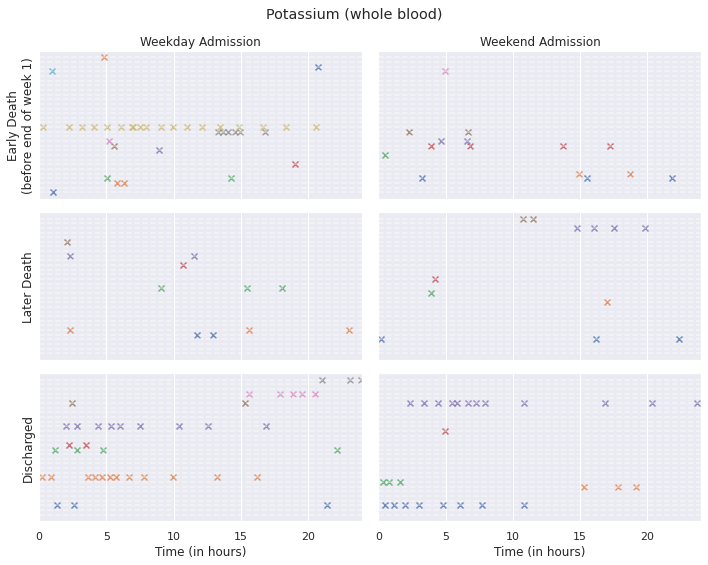

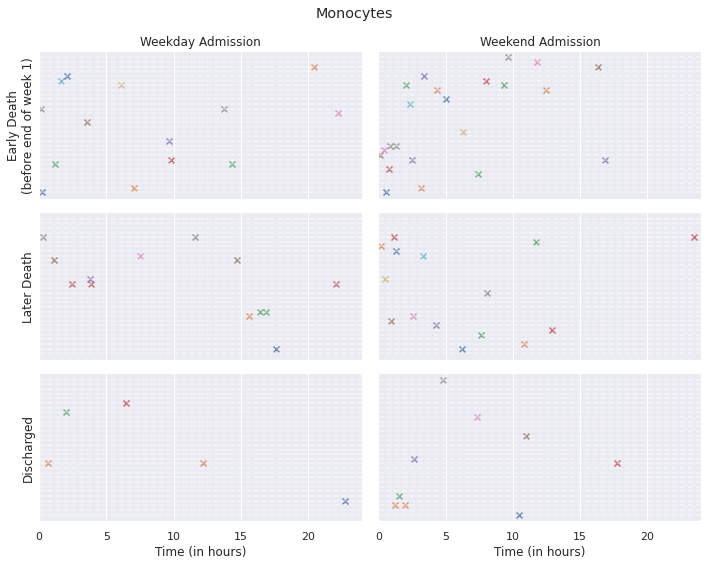

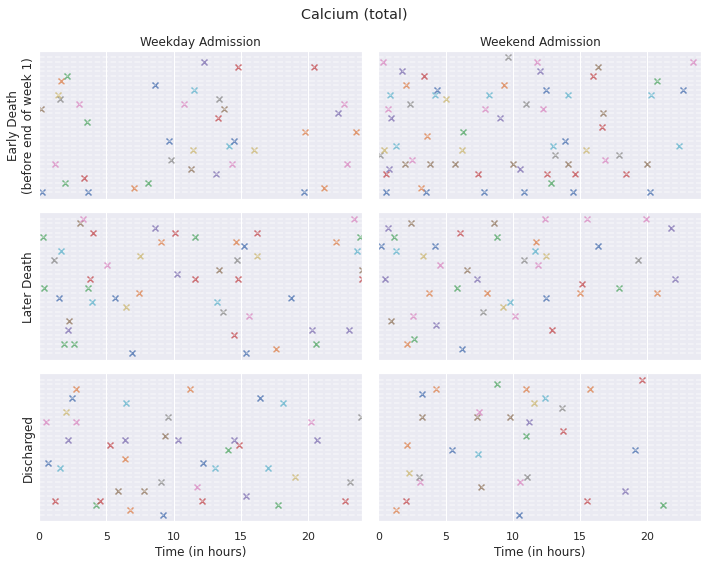

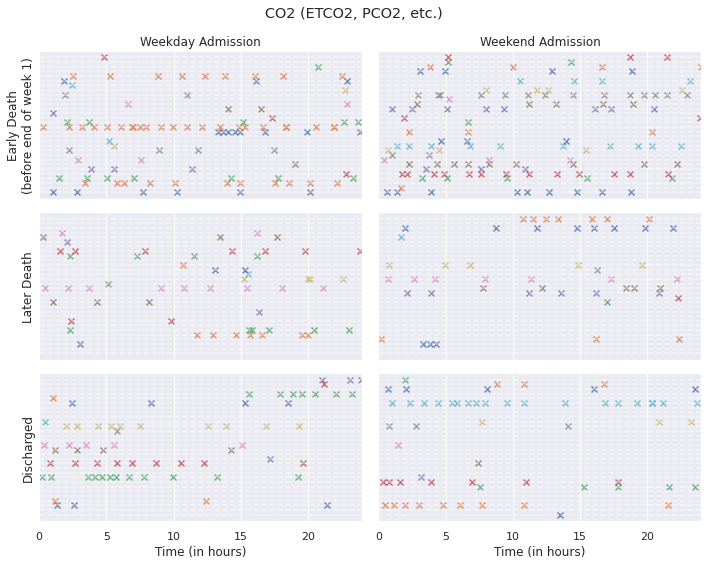

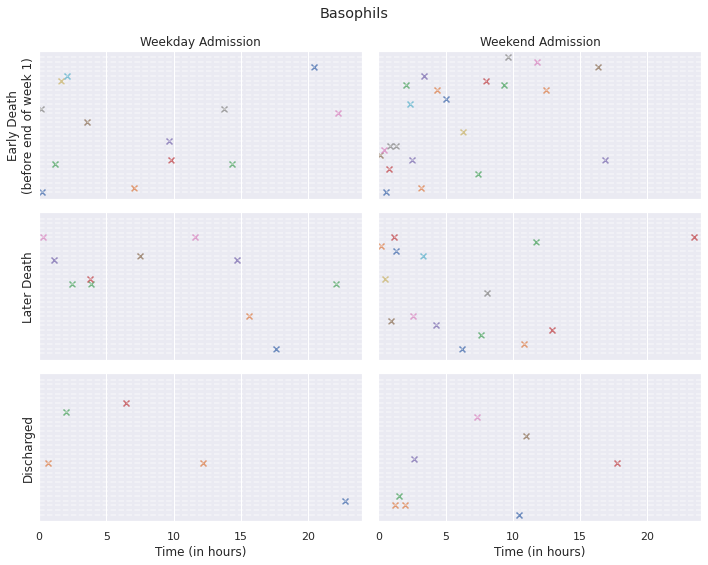

In [63]:
for l in np.random.choice(labs.columns, size = 5):
    labs_display = labs[l].dropna()

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8), sharex = True, sharey = True)
    fig.suptitle(l)

    for j, time in enumerate(random_selection.keys()):
        ax[0, j].set_title(time)
        for i, cat in enumerate(random_selection[time].keys()):
            ax[i, j].axes.yaxis.set_ticks([])
            ax[i, j].set_xlim([0, 24])
            ax[i, 0].set_ylabel(cat)
            for k, patient in enumerate(random_selection[time][cat].index):
                ax[i, j].plot([0, 24], [k, k], ls = '--', alpha = 0.5, c = 'w')
                try:
                    data_patient = labs_display.loc[patient].index
                    ax[i, j].scatter(24 * data_patient, [k] * len(data_patient), alpha = 0.8, marker = 'x')
                except:
                    pass
    ax[-1, 1].set_xlabel('Time (in hours)')
    ax[-1, 0].set_xlabel('Time (in hours)')
    plt.tight_layout()
    plt.show()